# 1. Defining the Question

## a) Specifying the Data Analytic Question

The objective is to determine whether the people onboard survived or not.

## b) Defining the Metric for Success

Successfully having a model that predicts whether people onboard survived or not.

## c) Understanding the context

The dataset has 891 rows and 12 columns. 

The following is a description of the columns:

• Survived: This feature has value 0 and 1. 0 for not survived and 1 for survived.

• Pclass: There are 3 classes: Class 1, Class 2 and Class 3.

• Name: Name of passenger.

• Sex: Gender of passenger.

• Age: Age of passenger.

• SibSp: Indication that passengers have siblings and spouses.

• Parch: Whether a passenger is alone or has a family.

• Ticket: Ticket number of passenger.

• Fare: Indicating the fare.

• Cabin: The cabin of passenger.

• Embarked: The port embarked category; C = Cherbourg, Q = Queenstown, S = Southampton


## d) Recording the Experimental Design

1) Define the question, the metric for success, understanding the context and, recording the experimental design taken.

2) Import the libraries, disable future warnings, read and, explore the dataset provided.

3) Define the appropriateness of the available data to answer the given question.

4) Find and deal with outliers, anomalies and missing data within the dataset.

5) Perform univariate and bivariate analysis recording the observations.

6) Build the model using K Nearest Neighbors

7) Randomly partition each dataset into two parts i.e 80-20, 70-30, 60-40 sets.

8) Challenge the solution

9) Conclusions and Recommendations

## e) Data Relevance

Datasets containing the data with different aspects of the titanic have been provided for this project.

[Train](https://archive.org/download/train5_202002/train%20%285%29.csv)

[Test](https://archive.org/download/test1_202002/test%20%281%29.csv)

# 2. Reading the Data

In [4]:
#importing our necessary libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [5]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = https://archive.org/download/train5_202002/train%20%285%29.csv
# ---
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# 3. Checking the Data

In [6]:
# Previewing the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Previewing the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Checking the records of both datasets
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


The dataset has 891 rows and 12 columns

In [9]:
# Checking whether each column has an appropriate datatype
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# Checking whether each column has an appropriate datatype
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Check the statistical description of the continous variables 
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset.

# 5. Tidying the Dataset

In [12]:
#Disable future warnings by running this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [13]:
# Check the columns of our train dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# Check for duplicates
#---
col_names = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

def checkIfDuplicates(col_names):
    ''' Check if given list of columns contains any duplicates '''
    if len(col_names) == len(set(col_names)):
        return False
    else:
        return True


result = checkIfDuplicates(col_names)

if result:
    print('Yes, list contains duplicates')
else:
    print('No duplicates found in list')    


No duplicates found in list


In [15]:
# Checking for missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Dealing with the missing values by imputting with the mean
#---
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Fare'].fillna(train['Fare'].mean(), inplace=True)
train['Embarked'].fillna('S', inplace=True)

In [18]:
# Making new data frame with dropped NA values 
train1 = train.dropna(axis = 0, how ='any') 
    
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [19]:
# Checking to see if the changes have been effected
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

All the null values have been dropped as seen in the new dataset

In [20]:
# Dropping the unnecessary columns that will not aid in predicting the survival
# of passengers
#---
train1.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
train1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


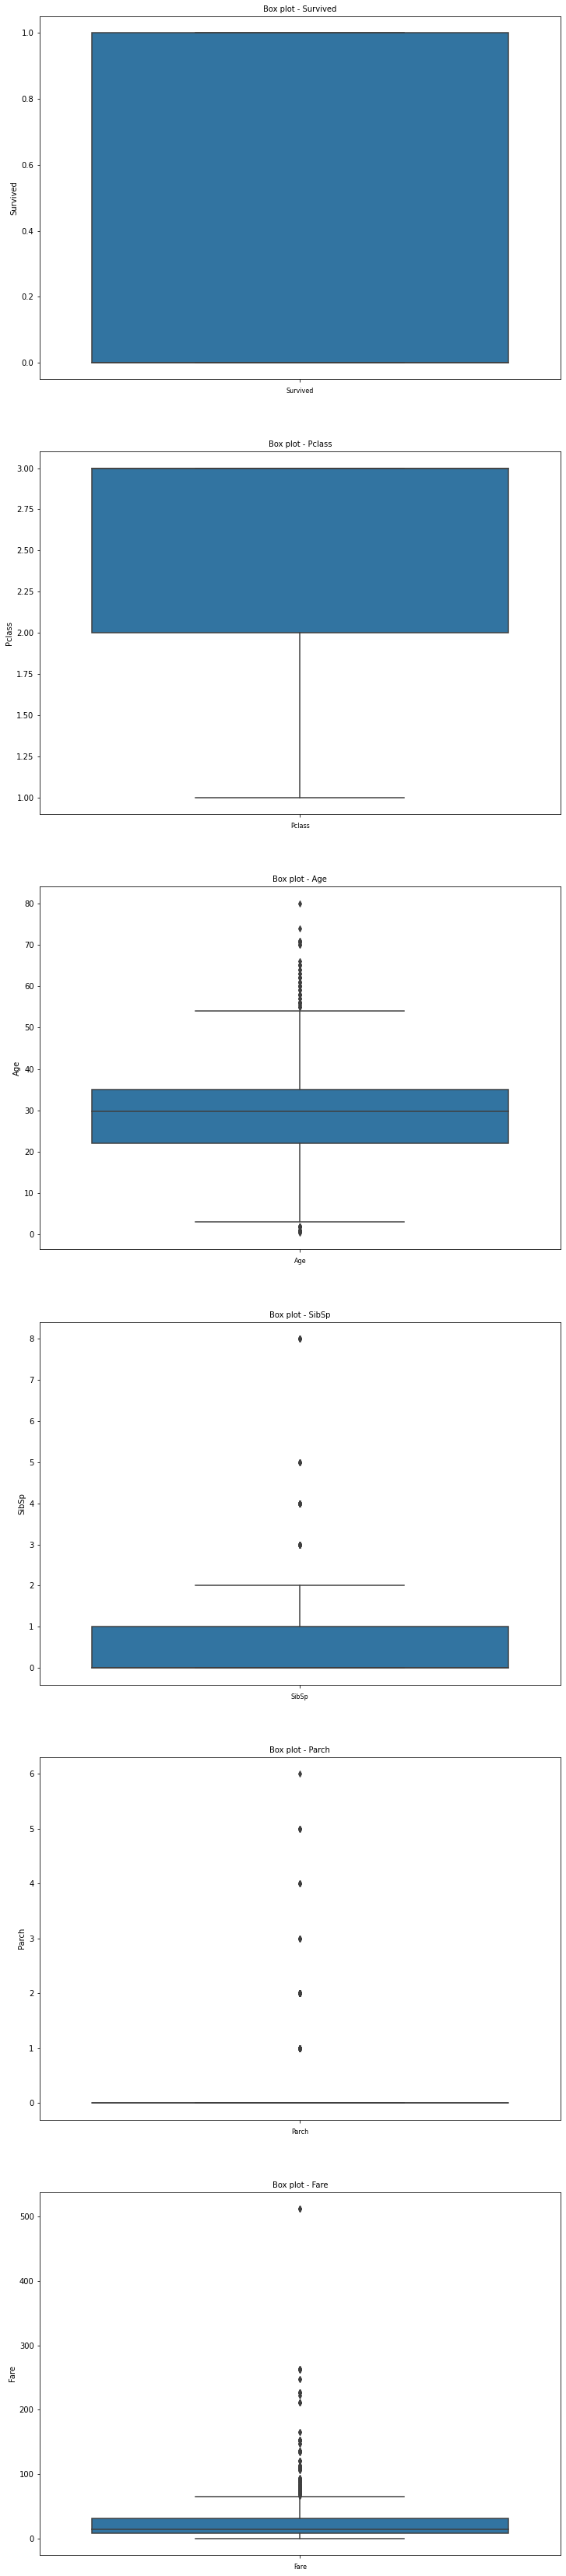

In [21]:
# Checking for Outliers
#---
# Create a variable for the numerical columns
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(num_cols), figsize=(12,60))

for i, col_val in enumerate(num_cols):

    sns.boxplot(y=train[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [22]:
# Checking for Anomalies
#---
train2 = train1[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                 'Cabin', 'Embarked']]
Q1 = train2.quantile(0.25)
Q3 = train2.quantile(0.75)
IQR = Q3 - Q1
((train2 < (Q1 - 1.5 * IQR)) | (train2 > (Q3 + 1.5 * IQR))).sum()

Age          0
Cabin        0
Embarked     0
Fare        17
Parch        1
Pclass      28
Sex          0
SibSp        3
Survived     0
dtype: int64

# 6. Exploratory Analysis

## 6.1) Univariate Analysis

In [23]:
# Checking whether each column has an appropriate datatype
train1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

Sex, Cabin and Embarked are categorical variables and we will show their frequency distributions using bar charts. However, we shall not plot the cabin variable.

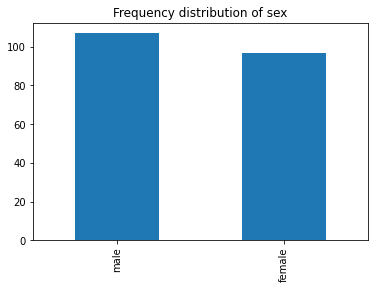

In [24]:
# Plotting a bar chart to show the frequency distribution of sex
# 
train1['Sex'].value_counts().plot.bar(title='Frequency distribution of sex')

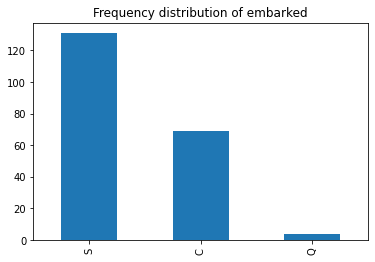

In [25]:
# Plotting a bar chart to show the frequency distribution of embarked 
train1['Embarked'].value_counts().plot.bar(title='Frequency distribution of embarked')

Now we shall plot the continous variables to show their frequency distribution

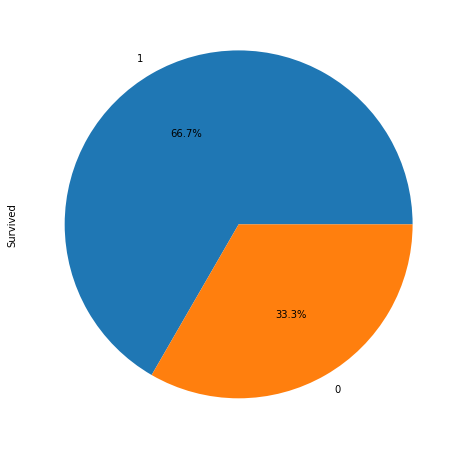

In [26]:
# Plotting a pie chart for survived 
#
plt.figure(figsize = (8, 8))
train1.Survived.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

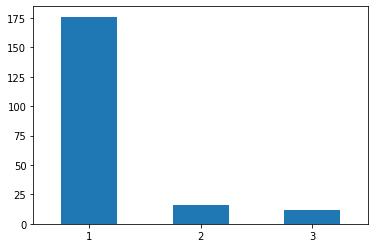

In [27]:
# Plotting a bar chart to show the frequency distribution of Pclass
#---
train1.Pclass.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

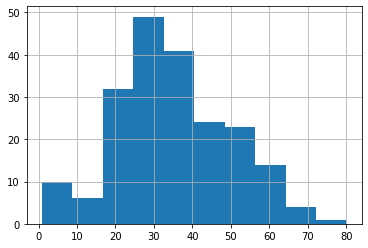

In [28]:
# Plotting a histogram to show the frequency distribution of age
#---
train1['Age'].hist()

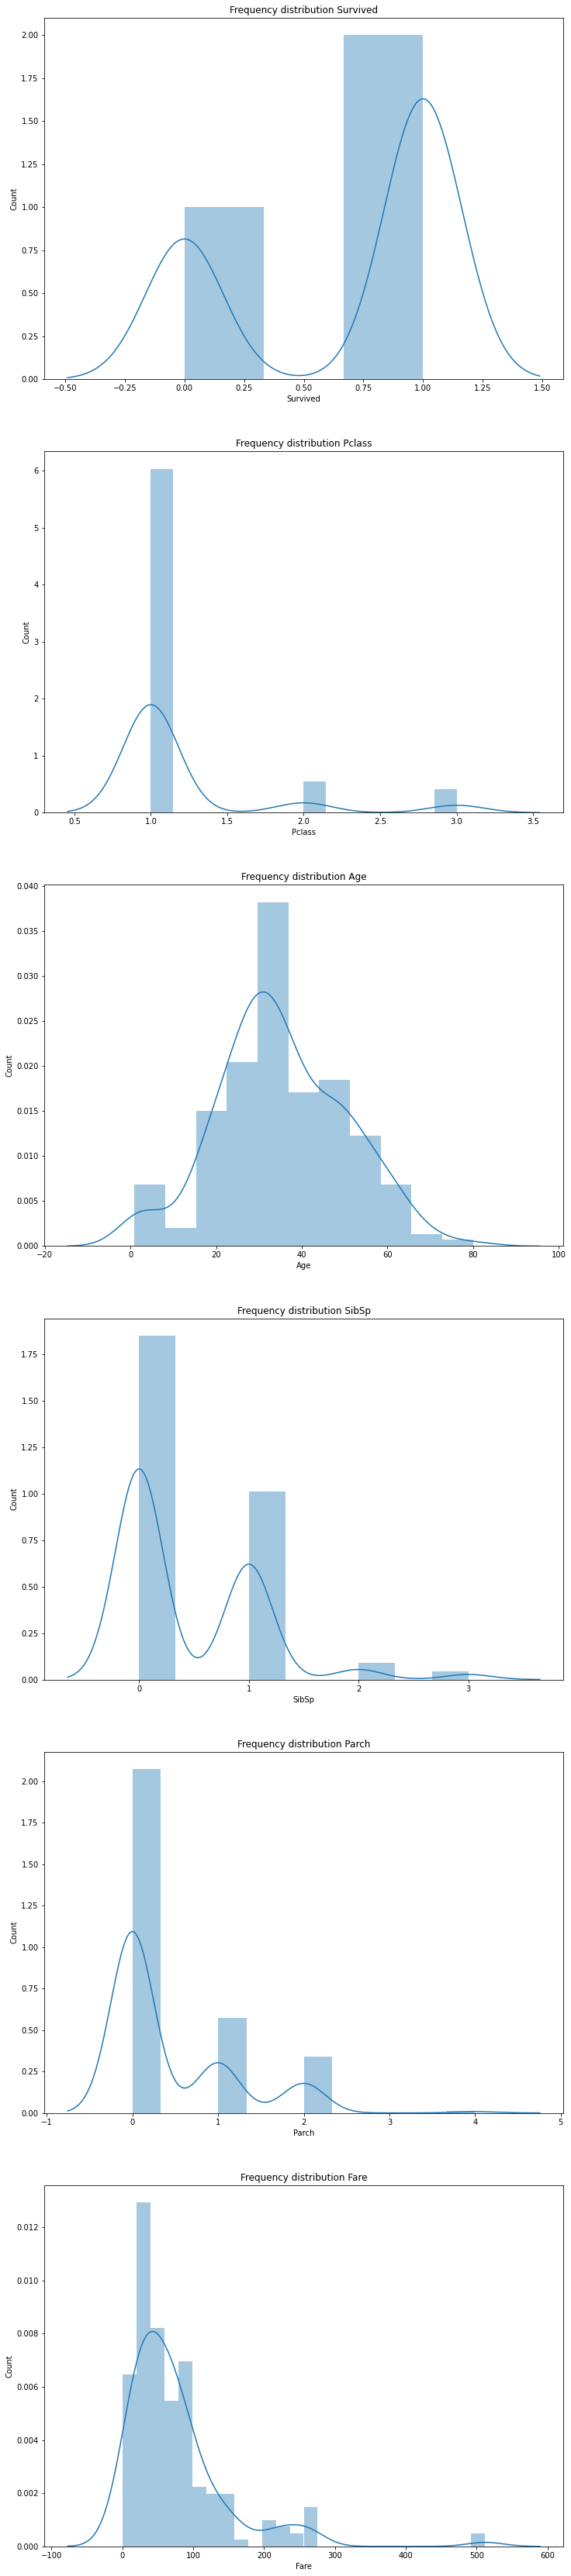

In [29]:
# Ploting a summary of the frequency distribution of numerical columns
#---
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(num_cols), figsize=(12,60))

for i, col_val in enumerate(num_cols):

    sns.distplot(train1[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution '+col_val, fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=10)
    ax[i].set_ylabel('Count', fontsize=10)

plt.show()

In [30]:
# Checking the statistical description of the continuous variables
# 
train1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.666667,1.196078,35.258349,0.441176,0.436275,76.141504
std,0.472564,0.525961,15.034028,0.628918,0.729976,74.391749
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,29.453125
50%,1.000000,1.000000,34.000000,0.000000,0.000000,55.220850
75%,1.000000,1.000000,47.000000,1.000000,1.000000,89.328150
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [31]:
# Let's compute the median of the continuous variables

num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

median = train[num_cols].median()

median.sort_values(ascending=False)

Age         29.699118
Fare        14.454200
Pclass       3.000000
Survived     0.000000
SibSp        0.000000
Parch        0.000000
dtype: float64

In [32]:
# Let's get the skewness
#---
skewed = train1[num_cols].skew()

skewed.sort_values(ascending=False)

Fare        2.745180
Pclass      2.647430
Parch       1.643242
SibSp       1.484123
Age         0.114428
Survived   -0.712355
dtype: float64

In [33]:
# Let's get the kurtosis
#---
kurt = train1[num_cols].kurt()

kurt.sort_values(ascending=False)

Fare        11.105671
Pclass       5.840671
SibSp        2.648215
Parch        2.456404
Age         -0.028406
Survived    -1.507426
dtype: float64

In [34]:
# Let's get the variance 
#---
var = train1[num_cols].var()

var.sort_values(ascending=False)

Fare        5534.132342
Age          226.022011
Parch          0.532865
SibSp          0.395538
Pclass         0.276635
Survived       0.223317
dtype: float64

## 6.2 Bivariate Analysis

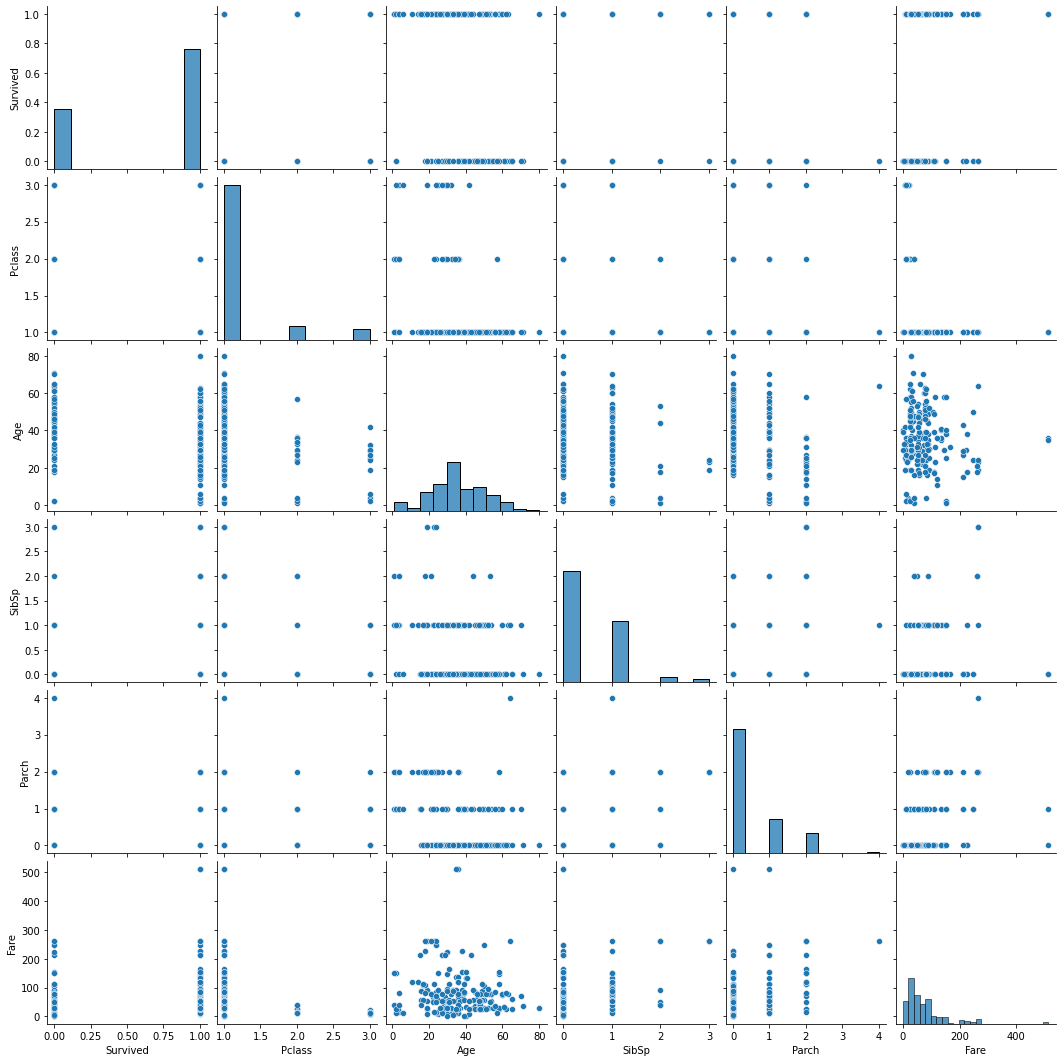

In [35]:
# Ploting the bivariate summaries 
#---
sns.pairplot(train1)

In [36]:
# Building a correlation matrix
#---
correlation = train1.corr()
correlation

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.033032,-0.222591,0.132599,0.038081,0.128306
Pclass,-0.033032,1.000000,-0.288340,-0.084097,0.058366,-0.311713
Age,-0.222591,-0.288340,1.000000,-0.145272,-0.250359,-0.075563
SibSp,0.132599,-0.084097,-0.145272,1.000000,0.265411,0.290696
Parch,0.038081,0.058366,-0.250359,0.265411,1.000000,0.383972
Fare,0.128306,-0.311713,-0.075563,0.290696,0.383972,1.000000


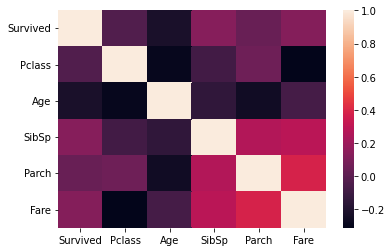

In [37]:
# Creating a heatmap to represent the magnitude of the correlation variable
#---
sns.heatmap(correlation)

As seen on the heatmap, the variables are not correlated.

# 7. Implementing the Solution

## 7.1) Modelling

### 7.1.1) K-Nearest Neighbors (KNN)

In [38]:
# compute the VIF
#---
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.082390,0.065322,0.259632,-0.092386,0.084630,-0.104536
Pclass,0.065322,1.273694,0.382070,0.065455,-0.177762,0.466744
Age,0.259632,0.382070,1.244441,0.099436,0.228760,0.063074
SibSp,-0.092386,0.065455,0.099436,1.147793,-0.196113,-0.218586
Parch,0.084630,-0.177762,0.228760,-0.196113,1.305933,-0.493415
Fare,-0.104536,0.466744,0.063074,-0.218586,-0.493415,1.416668


There is no cause for concern as our VIF scores are below 4.

### 7.1.2) Split the data by 80-20 sets

In [39]:
# Preview the dataset
train1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
871,1,1,female,47.0,1,1,52.5542,D35,S
872,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,83.1583,C50,C
887,1,1,female,19.0,0,0,30.0000,B42,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [40]:
# Splitting our dataset into its attributes and labels
# ---
test_features = train1.columns.to_list()
test_features.remove('Survived')

X = train1[test_features]
X = pd.get_dummies(X)
y = train1['Survived'].values

In [41]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [42]:
# Feature Scaling
# ---
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Training our model
# ---
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:
# Make predictions on our test data
# ---
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
comparison_frame.head(6)

,Actual,Predicted
0,0,1
1,1,1
2,0,1
3,1,1
4,0,1
5,1,1


In [45]:
# Evaluating the Algorithm
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score
# are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics
# can be used to calculate these metrics. 
# ---
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1 13]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.68      1.00      0.81        27

    accuracy                           0.68        41
   macro avg       0.84      0.54      0.47        41
weighted avg       0.79      0.68      0.58        41



Our model gave an accuracy of 68% which is not good and needs to be improved.

### 7.1.3) Split the data by 70-30 sets

In [46]:
# Splitting our dataset into its attributes and labels
# ---
test_features = train1.columns.to_list()
test_features.remove('Survived')

X = train1[test_features]
X = pd.get_dummies(X)
y = train1['Survived'].values

In [47]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [48]:
# Feature Scaling
# ---
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Training our model
# ---
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [50]:
# Make predictions on our test data
# ---
y_pred = classifier.predict(X_test)

comparison_frame2 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
comparison_frame2.tail(6)

,Actual,Predicted
56,0,1
57,1,1
58,1,1
59,0,1
60,1,1
61,1,1


In [51]:
# Evaluating the Algorithm
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score
# are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics
# can be used to calculate these metrics. 
# ---
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 22]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.65      1.00      0.78        40

    accuracy                           0.65        62
   macro avg       0.32      0.50      0.39        62
weighted avg       0.42      0.65      0.51        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model gave a low accuracy of 65% which is lower than the previous one.

### 7.1.4) Split the data by 60-40 sets

In [52]:
# Splitting our dataset into its attributes and labels
# ---
test_features = train1.columns.to_list()
test_features.remove('Survived')

X = train1[test_features]
X = pd.get_dummies(X)
y = train1['Survived'].values

In [53]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

In [54]:
# Feature Scaling
# ---
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Training our model
# ---
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [56]:
# Make predictions on our test data
# ---
y_pred = classifier.predict(X_test)

comparison_frame3 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
comparison_frame3.tail(6)

,Actual,Predicted
76,1,1
77,0,1
78,1,1
79,0,1
80,0,1
81,1,1


In [57]:
# Evaluating the Algorithm
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score
# are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics
# can be used to calculate these metrics. 
# ---
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 27]
 [ 0 55]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.67      1.00      0.80        55

    accuracy                           0.67        82
   macro avg       0.34      0.50      0.40        82
weighted avg       0.45      0.67      0.54        82



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We got an improvement on the accuracy score of 67%

# 8. Challenging the solution

## 8.1) Linear discriminant analysis(LDA)

We need our model to improve it's performance therefore we shall use LDA to see if that happens.

In [58]:
# Splitting our dataset into its attributes and labels
# ---
test_features = train1.columns.to_list()
test_features.remove('Survived')

X = train1[test_features]
X = pd.get_dummies(X)
y = train1['Survived'].values

In [59]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [60]:
# Feature Scaling
# ---
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# Performing LDA
#---
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [62]:
# Train our model
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [63]:
# Make predictions on our test data
# ---
y_pred_lda = classifier.predict(X_test)

comparison_frame4 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred_lda.flatten()})
comparison_frame4.tail(6)

,Actual,Predicted
56,0,0
57,1,1
58,1,1
59,0,1
60,1,1
61,1,1


In [64]:
# Evaluating the Algorithm
#---
print(classification_report(y_test, y_pred_lda))
print(confusion_matrix(y_test, y_pred_lda))
print('accuracy score', accuracy_score(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56        22
           1       0.76      0.65      0.70        40

    accuracy                           0.65        62
   macro avg       0.63      0.64      0.63        62
weighted avg       0.67      0.65      0.65        62

[[14  8]
 [14 26]]
accuracy score 0.6451612903225806


# Conclusion

1. Our model did not improve it's performance after using LDA. In fact, it gave an accuracy of 65%.

2. The data proved to have lower accuracies every time it was split further.

3. Splitting the data by 80-20 sets proved to be the best as it's accuracy was 68%.

# Recommendations

1. To improve the accuracy scores, hyperparameter tuning should be considered as it's an essential part of controlling the behavior of a model.

2. Splitting the data by 80-20 sets proved to be the best therefore, it would be recommended to use it.

# 9. Follow up questions

## a). Did we have the right data?

Yes. There was a satisfactory sample size that explored key factors which helped to predict whether a person survived or not. 

## b). Do we need other data to answer our question?

Since the data was adequate, there is no need for more as the question was answered.

## c). Did we have the right question?

Yes. It was possible to create models that made predictions of whether a person survived or not.